
Current year: 2020
Case 0 not included: peak winds < 50 m/s
Case 1 not included: peak winds < 50 m/s
Case 2 not included: peak winds < 50 m/s
Case 3 not included: peak winds < 50 m/s
Case 4 not included: peak winds < 50 m/s
Case 5 not included: peak winds < 50 m/s
Case 6 not included: peak winds < 50 m/s
Dataset 7 loaded
Dataset 8 loaded
Dataset 9 loaded
Case 10 not included: peak winds < 50 m/s
Case 11 not included: peak winds < 50 m/s
Dataset 12 loaded
Case 13 not included: peak winds < 50 m/s
Case 14 not included: peak winds < 50 m/s
Case 15 not included: peak winds < 50 m/s
Dataset 16 loaded
Case 17 not included: peak winds < 50 m/s
Case 18 not included: peak winds < 50 m/s
Case 19 not included: peak winds < 50 m/s
Auto variables added
Chosen variables added

Current year: 2021
Dataset 0 loaded
Dataset 1 loaded
Dataset 2 loaded
Dataset 3 loaded
Dataset 4 loaded
Dataset 5 loaded
Dataset 6 loaded
Dataset 7 loaded
Dataset 8 loaded
Error in first if statement! there should alway be va

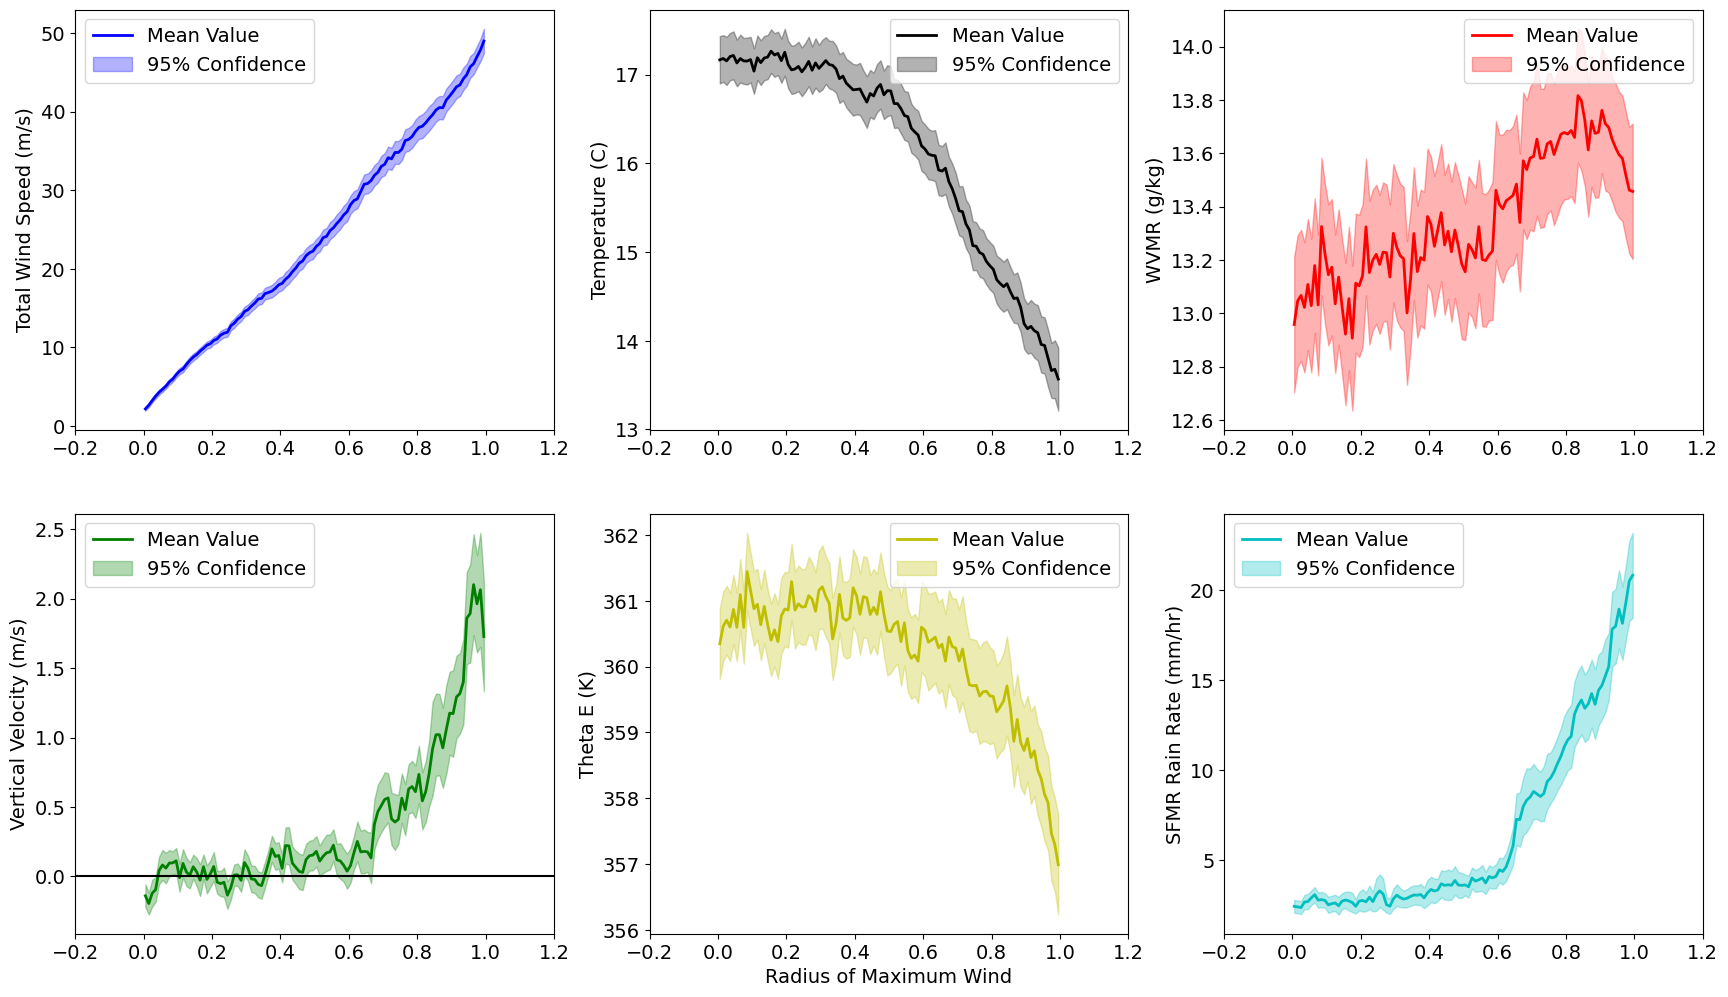

In [1]:
%%time

####################################################
# 2/14/23 update:
# if necessary, call this cell to save datasets again (and to make a pretty figure along the way lol)
# simple years like '2020' or 'all' data can be called, but code is provided to use all the 'good' eyewall fixes
# from 2020 to 2022
####################################################
import os
os.chdir( "/Users/etmu9498/research/code/scripts")
import make_plots
os.chdir( "/Users/etmu9498/research/code/scripts/plotting")
import fl_mean_plots_error


# remove certain datasets from a problem list!
newdict = {}

years = ['2020', '2021', '2022']

bad_data2020 = ['20200922H1_AC.nc', '20200918H1_AC.nc', '20200918I1_AC.nc', '20200917H1_AC.nc']
bad_data2021 = ['20210829I1_AC.nc', '20210906I1_AC.nc', '20210927I1_AC.nc']
bad_data2022 = ['20220918H1_AC.nc', '20220920H1_AC.nc', '20220920I1_AC.nc']

bad_data = [ bad_data2020, bad_data2021, bad_data2022]

for yeari, year in enumerate( years):
    templist = make_plots.load_flight_level( "/Users/etmu9498/research/data/in-situ-noaa-full/" + year, print_files=False)

    # get rid of problem datasets!
    for name in bad_data[ yeari]:
        templist.remove( name)
    
    # add the remaining good cases to the input dict
    newdict[ year] = templist


fl_mean_plots_error.make_plot( tc = newdict, max_v_requirement=40, save_datasets=True)

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import xarray as xr


os.chdir("/Users/etmu9498/research/code/scripts")
import helper_fns

In [5]:
os.chdir( "/Users/etmu9498/research/data/in-situ-binned-averages/")

df_passes = pd.read_pickle( 'all_passes.pkl')
df_binned = pd.read_pickle( 'binned_values.pkl')

In [6]:
print( df_passes)

                name  year  pass  \
0   20200825H2_AC.nc  2020     0   
1   20200825H2_AC.nc  2020     1   
2   20200825H2_AC.nc  2020     2   
3   20200825H2_AC.nc  2020     3   
4   20200826H1_AC.nc  2020     0   
5   20200826H1_AC.nc  2020     1   
6   20200826H1_AC.nc  2020     2   
7   20200826H1_AC.nc  2020     3   
8   20200826H1_AC.nc  2020     4   
9   20200826H2_AC.nc  2020     0   
10  20200826H2_AC.nc  2020     1   
11  20200826H2_AC.nc  2020     2   
12  20200826H2_AC.nc  2020     3   
13  20200826H2_AC.nc  2020     4   
14  20200914I1_AC.nc  2020     0   
15  20200914I1_AC.nc  2020     1   
16  20200914I1_AC.nc  2020     2   
17  20200917I1_AC.nc  2020     0   
18  20200917I1_AC.nc  2020     1   
19  20200917I1_AC.nc  2020     2   
20  20210828H1_AC.nc  2021     0   
21  20210828H1_AC.nc  2021     1   
22  20210828H1_AC.nc  2021     2   
23  20210828I1_AC.nc  2021     0   
24  20210828I1_AC.nc  2021     1   
25  20210828I1_AC.nc  2021     2   
26  20210828I1_AC.nc  2021  

Text(0.5, 0, 'Radius of Maximum Wind (RMW)')

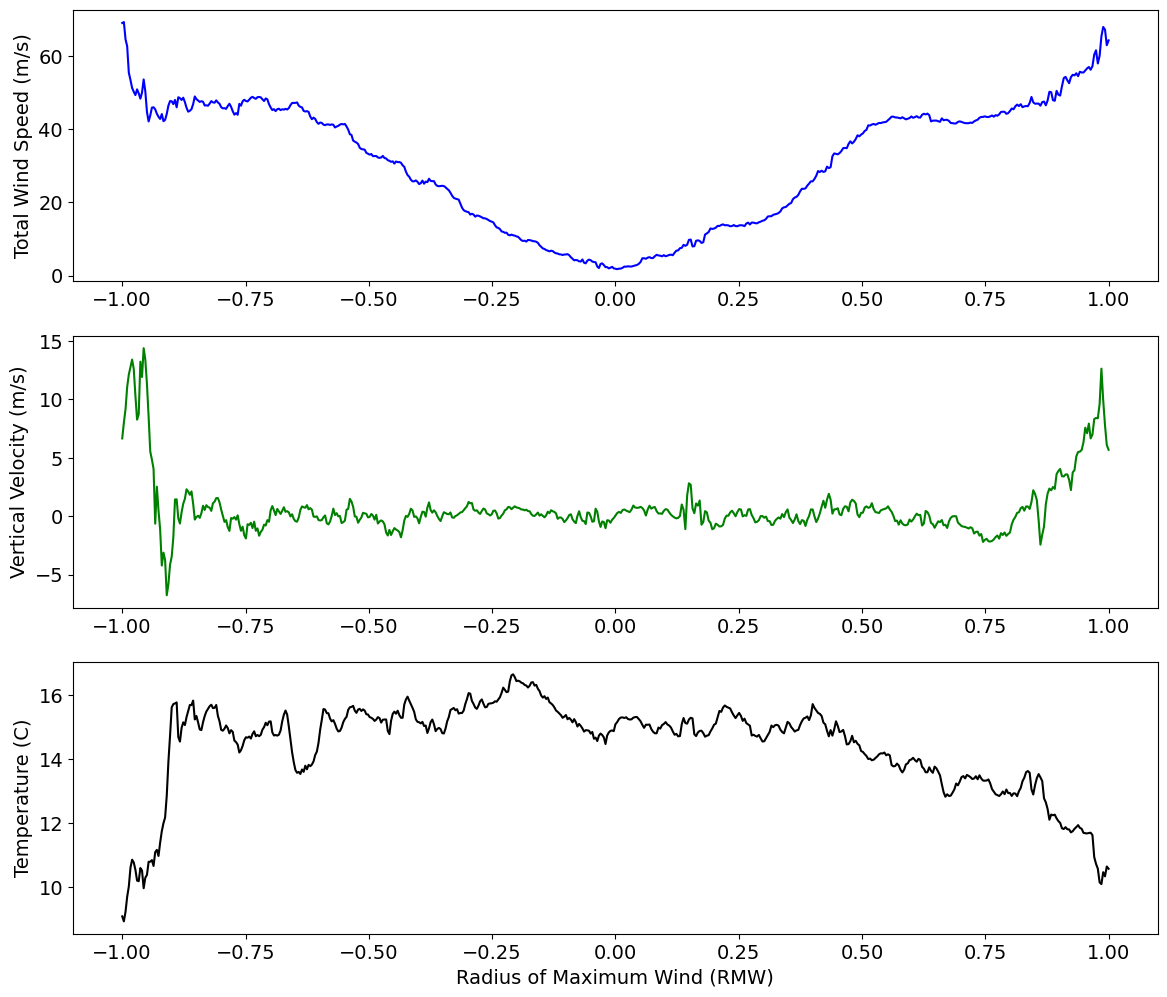

In [8]:
##############################
# making a test plot, finding some effective N stats for one case!!
##############################
case = 45 # 9/29/21 pm flight eye pass 0
rmw = df_passes['rmw'][case]
w = df_passes['w'][case]
temp = df_passes['temp'][case]
ws = df_passes['wind_speed'][case]

plt.figure( figsize=( 14, 12))

plt.subplot( 311)
plt.plot( rmw, ws, c='b')
plt.ylabel( "Total Wind Speed (m/s)")

plt.subplot( 312)
plt.ylabel( "Vertical Velocity (m/s)")
plt.plot( rmw, w, c='g')

plt.subplot( 313)
plt.ylabel( "Temperature (C)")
plt.plot( rmw, temp, c='k')
plt.xlabel( "Radius of Maximum Wind (RMW)")

In [2]:
#######
## stats
#######

### Calculate some basic statistics about your data variable
data = temp.to_pandas()
print( type( data))

N=len(data)
sigma=np.std(data)  ## calculate the standard deviation
mean=np.mean(data)  ## calculate the mean
print(f'Sample Size N: {N}')
print(f'Mean: {round(mean,1)}')
print(f'Standard Deviation: {round(sigma,1)}')


NameError: name 'temp' is not defined

In [20]:
## Estimate lag-1 autocorrelation
lag=1
t1_m=data.iloc[0:-1*lag]-mean
t2_m=data.iloc[lag:]-mean

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
AR1_np=np.correlate(t1_m,t2_m,mode='valid')/(N-lag)/(sigma**2)
print(f'np.correlate AR1: {round(AR1_np[0],5)}')

#Method #2
#Calculate the autocorrelation using numpy dot (direct calculation)
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
AR1=np.dot(t1_m,t2_m)/(N-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print(f'direct calculation AR1: {round(AR1,5)}')

print('Did you get the same answer using np.correlate and the direct calculation')

np.correlate AR1: 0.9759799838066101
direct calculation AR1: 0.97598
Did you get the same answer using np.correlate and the direct calculation


In [21]:
## Calculate effective sample size (N*)
## Note: Leith function to estimate N* is not well behaved for large autocorrelations
## Prof. Kay recommends using Wilks

Nstar_wilks=round(((1-AR1)/(1+AR1))*N) ## Barnes Chapter 2 eq. 88
Nstar_leith=round((-0.5*np.log(AR1))*N) ## Barnes Chapter 2 eq. 90
print('Number of samples N:',N)
print(f'Effective Sample Size Wilks N* (#independent samples): {Nstar_wilks}')
print(f'Effective Sample Size Leith N* (#independent samples): {Nstar_leith}')

Number of samples N: 575
Effective Sample Size Wilks N* (#independent samples): 7
Effective Sample Size Leith N* (#independent samples): 7


In [5]:
df_binned

,bins,midpoints,rmw_array,Time_array,wind_speed_array,w_array,Rain Rate_array,Theta E_array,Mixing Ratio_array,temp_array
0,0.00,0.005,"[-0.00909090909090915, -0.006818181818181834, ...","[21.223333333333333, 21.22361111111111, 21.223...","[0.69933707, 0.6609119, 0.5284961, 0.8685547, ...","[-0.18271893, -0.47635552, -0.61181164, -0.461...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6, 0.0, 0.9, ...","[361.9438, 361.37338, 361.68155, 362.47162, 36...","[13.255651, 13.050041, 13.164612, 13.387919, 1...","[14.992161, 15.04929, 15.004185, 15.073673, 15..."
1,0.01,0.015,"[-0.018181818181818188, -0.015909090909090984,...","[21.22222222222222, 21.2225, 21.22277777777778...","[1.840088, 1.5545082, 1.1407716, 0.9727589, 0....","[-0.07878132, 0.103391275, 0.15644859, 0.02564...","[0.0, 0.0, 0.0, 0.0, 1.2, 0.0, 0.0, 0.0, 0.0, ...","[362.284, 362.20126, 361.80472, 362.14905, 360...","[13.315065, 13.307776, 13.205172, 13.299373, 1...","[15.109592, 15.06522, 15.011662, 15.047398, 15..."
2,0.02,0.025,"[-0.02954545454545454, -0.027272727272727337, ...","[21.220833333333335, 21.221111111111114, 21.22...","[5.5200987, 4.8031144, 3.160316, 2.4148889, 2....","[0.02409517, 0.008030691, -0.20255117, -0.4190...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, ...","[362.50162, 362.34067, 361.94498, 362.10004, 3...","[13.376211, 13.311086, 13.171618, 13.229645, 1...","[15.1297035, 15.170109, 15.191868, 15.171635, ..."
3,0.03,0.035,"[-0.03863636363636369, -0.036363636363636376, ...","[21.219722222222224, 21.22, 21.220277777777778...","[5.8701873, 5.9373713, 5.5815167, 5.6855216, 1...","[-0.013429473, 0.051982712, 0.028183294, 0.113...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, ...","[362.64844, 363.01392, 363.1147, 362.5789, 362...","[13.446027, 13.51586, 13.548094, 13.371772, 13...","[15.067631, 15.180485, 15.183445, 15.206516, 1..."
4,0.04,0.045,"[-0.04772727272727273, -0.045454545454545525, ...","[21.218611111111112, 21.21888888888889, 21.219...","[6.75107, 6.683356, 6.895647, 6.397893, 1.4116...","[0.23711601, -0.08606359, -0.11716616, 0.18199...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, ...","[361.9686, 362.04865, 362.84448, 363.0625, 361...","[13.161311, 13.219138, 13.487509, 13.547411, 1...","[15.224735, 15.151432, 15.118656, 15.136509, 1..."
...,...,...,...,...,...,...,...,...,...,...
95,0.95,0.955,"[-0.9590909090909091, -0.9568181818181818, -0....","[21.107222222222223, 21.1075, 21.1077777777777...","[41.479046, 42.309093, 41.964848, 40.867836, 2...","[5.1952405, 2.4898994, 2.183459, 1.8086493, -0...","[36.8, 36.4, 35.7, 34.6, 10.9, 11.9, 0.0, 0.0,...","[362.76205, 362.23575, 361.13168, 360.62097, 3...","[14.748106, 14.665207, 14.395436, 14.261072, 1...","[11.834446, 11.676853, 11.455418, 11.412022, 1..."
96,0.96,0.965,"[-0.9681818181818181, -0.9659090909090909, -0....","[21.10611111111111, 21.10638888888889, 21.1066...","[41.49486, 40.1212, 39.661797, 39.929, 30.2775...","[7.3801355, 6.8124175, 7.0694284, 7.078558, -0...","[36.3, 36.8, 36.1, 36.5, 12.7, 13.0, 13.4, 0.0...","[360.89996, 360.72455, 361.56244, 362.31387, 3...","[14.271124, 14.120817, 14.313333, 14.580882, 1...","[11.605778, 11.815403, 11.923557, 11.8310585, ..."
97,0.97,0.975,"[-0.9795454545454545, -0.9772727272727273, -0....","[21.10472222222222, 21.105, 21.10527777777778,...","[42.52846, 43.2023, 42.15938, 42.34436, 42.788...","[6.7223163, 6.3551188, 7.231579, 7.01315, 7.16...","[32.2, 32.5, 32.5, 34.0, 35.7, 13.2, 12.8, 0.0...","[360.21957, 360.21713, 360.60342, 360.35614, 3...","[14.158527, 14.263909, 14.333827, 14.292023, 1...","[11.483891, 11.235416, 11.325077, 11.208164, 1..."
98,0.98,0.985,"[-0.9886363636363636, -0.9863636363636363, -0....","[21.10361111111111, 21.10388888888889, 21.1041...","[44.222435, 41.33287, 39.802937, 40.88515, 31....","[3.7782247, 5.1333947, 5.125894, 7.187838, 0.6...","[32.4, 32.7, 32.3, 32.4, 12.2, 11.6, 10.8, 0.0...","[358.0168, 359.0632, 359.66125, 359.98163, 360...","[13.490691, 13.75924, 13.974925, 14.07583, 13....","[11.471134, 11.63840

bin midpoint = 0.105


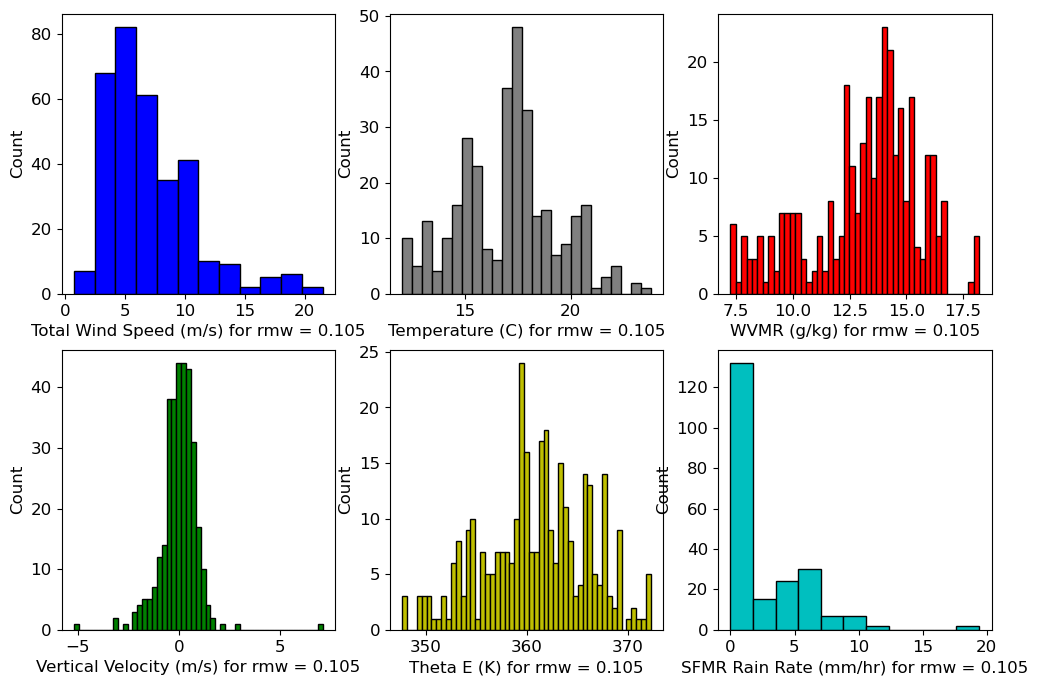

In [8]:
#################################
# look at histograms of the data for each variable within a given bin... are dists relatively normal?
#################################

spd_binsize = 1 # df_binned['bins'][1] - df_binned['bins'][0]
w_binsize = .25

bin_i = 10
print( 'bin midpoint = ' + str( np.round( df_binned['midpoints'][bin_i], 3)))

plt.figure( figsize=(12, 8))
helper_fns.change_font_sizes(12, 12)

subplot_list = [ 231, 232, 233, 234, 235, 236]
ylabels = [ "Total Wind Speed (m/s)", "Temperature (C)", "WVMR (g/kg)", "Vertical Velocity (m/s)", "Theta E (K)",
          "SFMR Rain Rate (mm/hr)"]
colors = ['b', 'Grey', 'r', 'g', 'y', 'c']

data_list = [ df_binned['wind_speed_array'][ bin_i], df_binned['temp_array'][ bin_i],
        df_binned['Mixing Ratio_array'][ bin_i], df_binned['w_array'][ bin_i], 
        df_binned['Theta E_array'][ bin_i], df_binned['Rain Rate_array'][ bin_i] ]
    
binsize = [ 2., .5, .25, .25, .5, 2]

for i in range( len( subplot_list)):
    plt.subplot( subplot_list[ i])
    min4hist=np.round(np.nanmin( data_list[ i]),1)-binsize[ i]
    max4hist=np.round(np.nanmax( data_list[ i]),1)+binsize[ i]
    nbins=int((max4hist-min4hist)/binsize[ i])

    plt.hist( data_list[ i],nbins,edgecolor='black', color=colors[ i])
    plt.xlabel( ylabels[ i] + ' for rmw = ' + str( np.round( df_binned['midpoints'][bin_i], 3)))
    plt.ylabel('Count')


In [17]:
###################
## use obj analysis methods to find better error limits for this rmw case!
###################

# convert confidence intervals into an input for the python lookup tables!
confidence = .95
diff = 1 - confidence
tableval = confidence + diff / 2
print( tableval)

# assume that all dists are normal... probs not the best assumption lol, especially for some wind spees and all rainfall...

# do this for each of the 6 plotted variables
for i in range( len( subplot_list)):

    print( "Variable: " + ylabels[i])
    
    # get data and find the degrees of freedom df
    data_inds = np.where( ~ np.isnan( data_list[ i])) [0]
    data = np.array( data_list[i]) [data_inds]
    N = len( data)
    df=N-1

    print( "Degrees of Freedom (not accounting for autocorrelation) = " + str( df))
    
    mean = data.mean()
    std = data.std()
    
    print( 'mean = ' + str( np.round( mean, 3)))
    print( 'standard dev = ' + str( np.round( std, 3)))
    
    # find the t test upper and lower limits
    tstat = stats.t.ppf( tableval, df)
    low_limitt = mean - tstat * ( std / np.sqrt( N-1))
    high_limitt = mean + tstat * ( std / np.sqrt( N-1))

    # find the z test upper and lower limits
    zstat = stats.norm.ppf( tableval)
    low_limitz = mean - zstat * ( std / np.sqrt( N))
    high_limitz = mean + zstat * ( std / np.sqrt( N))

    
    print('t test low limit = ' + str( np.round( low_limitt, 3)))
    print('t test high limit = ' + str( np.round( high_limitt, 3)))
    
    print('z test low limit = ' + str( np.round( low_limitz, 3)))
    print('z test high limit = ' + str( np.round( high_limitz, 3)))
    
    print( '\n')

0.975
Variable: Total Wind Speed (m/s)
Degrees of Freedom (not accounting for autocorrelation) = 346
mean = 22.852
standard dev = 9.077
t test low limit = 21.893
t test high limit = 23.812
z test low limit = 21.897
z test high limit = 23.807


Variable: Temperature (C)
Degrees of Freedom (not accounting for autocorrelation) = 346
mean = 16.817
standard dev = 2.593
t test low limit = 16.543
t test high limit = 17.091
z test low limit = 16.544
z test high limit = 17.09


Variable: WVMR (g/kg)
Degrees of Freedom (not accounting for autocorrelation) = 346
mean = 13.155
standard dev = 2.423
t test low limit = 12.899
t test high limit = 13.412
z test low limit = 12.901
z test high limit = 13.41


Variable: Vertical Velocity (m/s)
Degrees of Freedom (not accounting for autocorrelation) = 346
mean = 0.181
standard dev = 1.028
t test low limit = 0.072
t test high limit = 0.29
z test low limit = 0.073
z test high limit = 0.289


Variable: Theta E (K)
Degrees of Freedom (not accounting for autoco